### Board Games Database

This week's data comes from the [Board Game Geek](http://boardgamegeek.com/) database. The site's database has more than 90,000 games, with crowd-sourced ratings. There is also an R package with the fulldataset ([`bggAnalysis`](https://github.com/9thcirclegames/bgg-analysis)) but it hasn't been updated in ~2 years.

To follow along with a [fivethirtyeight article](https://fivethirtyeight.com/features/designing-the-best-board-game-on-the-planet/), I limited to only games with at least 50 ratings and for games between 1950 and 2016. This still leaves us with 10,532 games!

```{r}
board_games <- readr::read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-03-12/board_games.csv")
```

### Data Dictionary

|variable       |class     |description |
|:--------------|:---------|:-----------|
|game_id        |character | Unique game identifier         |
|description    |character | A paragraph of text describing the game       |
|image          |character | URL image of the game            |
|max_players    |integer   | Maximum recommended players           |
|max_playtime   |integer   | Maximum recommended playtime (min)           |
|min_age        |integer   | Minimum recommended age          |
|min_players    |integer   | Minimum recommended players         |
|min_playtime   |integer   | Minimum recommended playtime (min)           |
|name           |character | Name of the game           |
|playing_time   |integer   | Average playtime           |
|thumbnail      |character | URL thumbnail of the game           |
|year_published |integer   | Year game was published           |
|artist         |character | Artist for game art           |
|category       |character | Categories for the game (separated by commas)           |
|compilation    |character | If part of a multi-compilation - name of compilation           |
|designer       |character | Game designer           |
|expansion      |character | If there is an expansion pack - name of expansion           |
|family         |character | Family of game - equivalent to a publisher          |
|mechanic       |character | Game mechanic - how game is played, separated by comma         |
|publisher      |character | Comoany/person who published the game, separated by comma        |
|average_rating |double    | Average rating on Board Games Geek (1-10)        |
|users_rated    |double    | Number of users that rated the game           |


copied from [rfordatascience/tidytuesday](https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-03-12)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
!pip3 install plotly
import plotly
import plotly.express as px
from wordcloud import WordCloud
import numpy as np
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
!git clone https://github.com/aRahna/visualization.git
df = pd.read_csv("/content/visualization/board_games.csv", encoding='UTF-8')

fatal: destination path 'visualization' already exists and is not an empty directory.


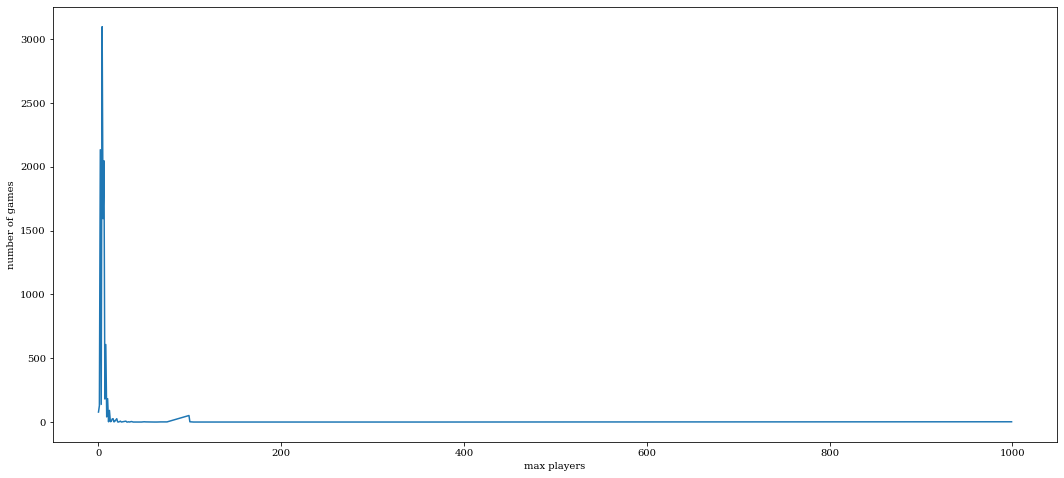

In [ ]:
df["max_players"].value_counts().sort_index().plot( 
    xlabel="max players",
    ylabel="number of games",
    figsize = (18,8)
)

One of our hypotheses is that the more people who participate in a game, the longer the game lasts.

In [ ]:
print(sorted(df["max_players"], reverse=True))

[999, 999, 999, 362, 200, 127, 104, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 75, 75, 68, 68, 64, 61, 52, 52, 50, 50, 50, 47, 42, 41, 40, 38, 36, 36, 36, 36, 36, 34, 33, 33, 33, 32, 31, 30, 30, 30, 30, 30, 30, 30, 30, 25, 24, 24, 24, 24, 24, 24, 24, 24, 22, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 1

In [ ]:
print(sorted(df["playing_time"], reverse=True))

[60000, 17280, 12000, 12000, 6000, 6000, 6000, 6000, 5400, 4500, 4320, 3600, 3600, 3600, 3000, 3000, 3000, 3000, 3000, 2880, 2880, 2480, 2400, 2400, 1800, 1800, 1500, 1500, 1440, 1440, 1440, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1000, 960, 960, 960, 960, 960, 900, 900, 750, 720, 720, 720, 720, 720, 720, 720, 720, 700, 600, 600, 600, 600, 600, 600, 600, 600, 540, 500, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 420, 420, 420, 420, 400, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 3

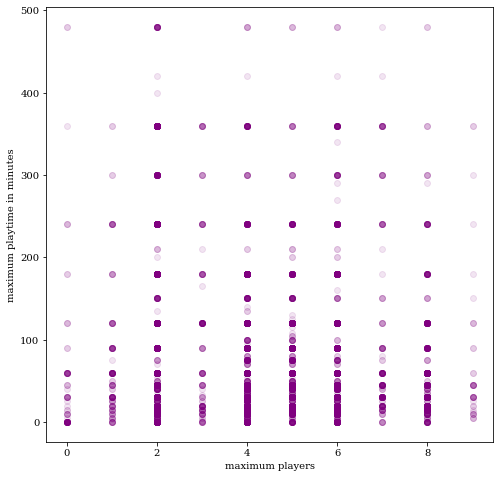

In [ ]:
df1 = df.loc[df['max_players'] < 10].loc[df['playing_time'] < 500]
plt.rcParams['font.family'] = ['serif']
plt.figure(figsize = (8,8))
plt.scatter(df1['max_players'], df1['max_playtime'], color='purple', alpha=0.1)
plt.ylabel('maximum playtime in minutes')
plt.xlabel('maximum players')
plt.show()

# Creating (probably) the most popular game:

- number of players
- category
- game duration

## Number of players

In [ ]:
best_games_df = df.loc[df['average_rating'] > 7].loc[df['users_rated'] > 5000]
best_games_df.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195
10,11,Bohnanza is the first in the Bohnanza family o...,//cf.geekdo-images.com/images/pic69366.jpg,7,45,13,2,45,Bohnanza,45,...,"Fréderic Bertrand,Marek Bláha,Andrea Boekhoff,...","Card Game,Farming,Negotiation",NaN,Uwe Rosenberg,"Auf der schwäb'schen Eisenbohn,Bohn Camillo,Bo...","Bohnanza,Lookout Bean Games","Hand Management,Set Collection,Trading","AMIGO Spiel + Freizeit GmbH,999 Games,Brain Ga...",7.06751,28354
11,12,Ra is an auction and set-collection game with ...,//cf.geekdo-images.com/images/pic3013552.jpg,5,60,12,2,45,Ra,60,...,"Allison Kline,Franz Vohwinkel","Ancient,Mythology",NaN,Reiner Knizia,NaN,"Alea Big Box,Country: Egypt,Ra","Auction/Bidding,Press Your Luck,Set Collection","alea,Ravensburger Spieleverlag GmbH,999 Games,...",7.47505,15378
12,13,"In Catan (formerly The Settlers of Catan), pla...",//cf.geekdo-images.com/images/pic2419375.jpg,4,120,10,3,60,Catan,120,...,"Volkan Baga,Tanja Donner,Pete Fenlon,Jason Haw...",Negotiation,"CATAN 3D Collector's Edition,Catan: Big Box,Ca...",Klaus Teuber,"20 Jahre Darmstadt Spielt,Brettspiel Adventska...","Catan,Promotional Board Games","Dice Rolling,Hand Management,Modular Board,Rou...","KOSMOS,999 Games,Albi,Astrel Games,Bergsala En...",7.26569,67655


In [ ]:
from statistics import mean
x = [] #number of players that has data
top_y = [] #top rating
av_y = [] #avarage rating
for i in range(13):
    temp_df = best_games_df.loc[df['max_players'] == i]
    rate = temp_df['average_rating'].values.tolist()
    if rate != []:
        x.append(i)
        top_y.append(max(rate))
        av_y.append(mean(rate))

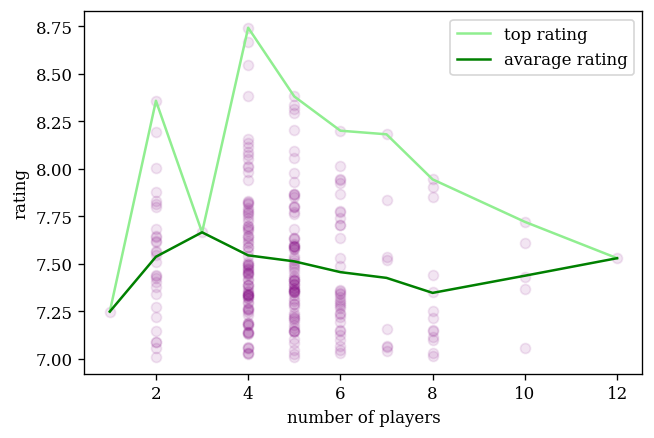

In [ ]:
plt.rcParams['font.family'] = ['serif']
plt.figure(dpi = 120)
#line plots
plt.plot(x, top_y, label='top rating', color="lightgreen")
plt.plot(x, av_y, label='avarage rating', color="green")
#scatter plot
plt.scatter(best_games_df['max_players'], best_games_df['average_rating'], color='purple', alpha=0.1)
plt.xlabel('number of players')
plt.ylabel('rating')
plt.legend(loc='best')
plt.show()

## Game duration

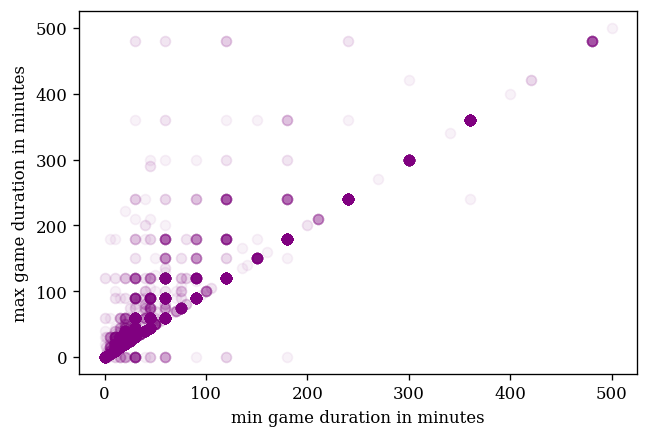

In [ ]:
df3 = df.loc[df['max_playtime'] <= 500]
plt.rcParams['font.family'] = ['serif']
plt.figure(dpi = 120)
plt.scatter(df3['min_playtime'], df3['max_playtime'], color='purple', alpha=0.05)
plt.ylabel('max game duration in minutes')
plt.xlabel('min game duration in minutes')
plt.show()

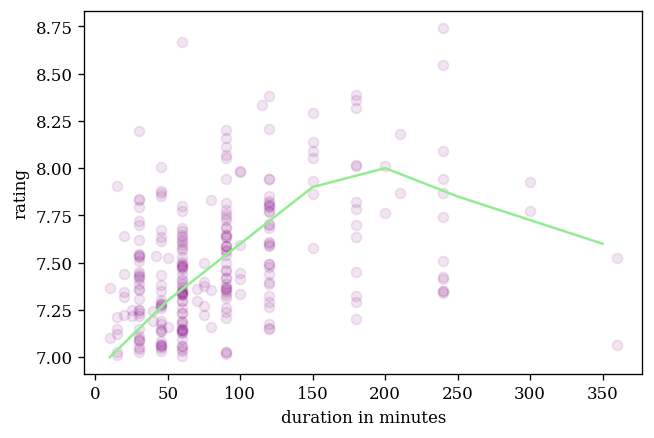

In [ ]:
plt.rcParams['font.family'] = ['serif']
plt.figure(dpi = 120)
plt.plot([10, 50, 100, 150, 200, 250, 350], [7, 7.3, 7.6, 7.9, 8, 7.85, 7.6], color='lightgreen')
plt.scatter(best_games_df['playing_time'], best_games_df['average_rating'], color='purple', alpha=0.1)
plt.xlabel('duration in minutes')
plt.ylabel('rating')
plt.show()

# Analysing **100 higly and low rated** board games categories

In [ ]:
dfsort = df.sort_values(by=['average_rating'], ascending=False)

In [ ]:
b = ''
for i in dfsort['category'].head(100):
    for q in i.split(","): 
        b += q + ' '

In [ ]:
d = ''
for i in dfsort['category'].tail(100):
    if type(i)!= float:
        for q in i.split(","):
            d += q + ' '

In [ ]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [ ]:
stop = ['Game']

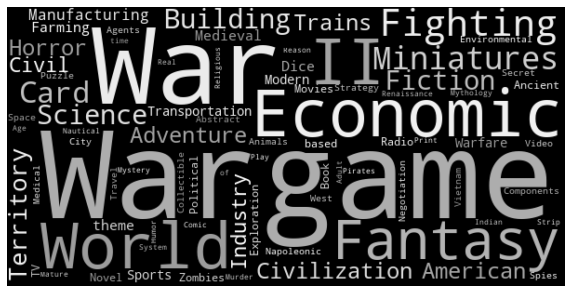

In [ ]:
# create a wordcloud 
wc = WordCloud(background_color='black',
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop).generate(b)

wc.recolor(color_func=grey_color_func)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('top_wordcloud.png')
plt.show()

According to 100 higly rated board games data, there is a lot of games about war, economy, fighting and fantasy. Probably, these categories are more preferable that others.

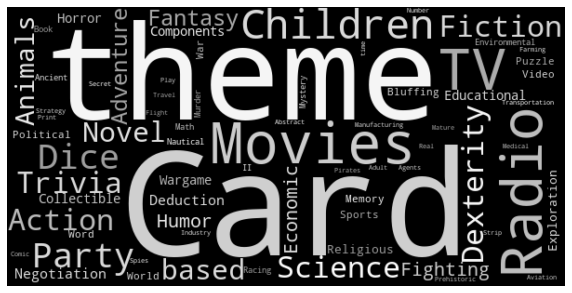

In [ ]:
# create a wordcloud 
wc = WordCloud(background_color='black',
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop).generate(d)

wc.recolor(color_func=grey_color_func)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('antitop_wordcloud.png')
plt.show()

As for low rated board games, it seems that card games and games about Radio/ TV/ Movies are not so appealing for users' tastes.

So, lets look at the distribution of years in dataset. There is data from 1950 to 2016, but we will not consider extra points and focus on data from 1977. Thus, there is a period of about 40 years from 1988 to 2016.

In [ ]:
fig = px.box(df['year_published'], y="year_published",  points="all", width=400, height=500, title="Distribution of years", color_discrete_sequence=['purple'])
fig.show()

It is obvious that we may now find ourselves in the middle of a golden age of serious board gaming. The number of titles, and their average ratings by players, increase each year. We also can say that it is possible to divide 1977-2016 period into two small 20 years periods: 1978-1998 and 1999-2016.

In [ ]:
fig = px.scatter(df, x="year_published", y="average_rating", title="A Golden Age of Board Games?", color_discrete_sequence=['purple'])
fig.show()

In two mentioned periods we also would like to observe distribution of minimal ages of games. 

In [ ]:
periods = df[['year_published', 'min_age']]
last = periods[periods["year_published"] > 1998]
first_up = periods[periods["year_published"] < 1998]
first_low = first_up[first_up["year_published"] > 1977]

In [ ]:
set(last["min_age"])

{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 25, 26, 42}

In [ ]:
set(first_low["min_age"])

{0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21}

In [ ]:
labels = [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 25, 26, 42]

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[480, 3, 24, 70, 141, 308, 252, 1637, 159, 1621, 47, 1667, 625, 537, 70, 43, 16, 47, 3, 1, 1, 1], name="1998-2016"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[83, 0, 15, 17, 29, 60, 72, 292, 34, 424, 7, 883, 24, 62, 11, 21, 1, 16, 1, 0, 0, 0], name="1977-1998"),
              1, 2)

# donut-like pie chart
fig.update_traces(hole=.6, hoverinfo="label+percent+name")

fig.update_layout(
    paper_bgcolor='white',
    title_text="Minimal ages for board games 1977-2016",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='1998-2016', x=0.18, y=0.5, font_size=14, showarrow=False),
                 dict(text='1977-1998', x=0.82, y=0.5, font_size=14, showarrow=False)])
fig.show()